# ENTREGA 1  

## Data Science I : Fundamentos para la Ciencia de Datos

#### Fecha: 19-06-2024
#### Alumno: Pedro Jofré
#### Comision:61155

### Objetivos: 
#### -Escoger Dataset
#### -Generar preguntas y/o Hipotesis para el dataset
#### -Generar un notebook para la carga y estudio de los datos
#### -Creacion de graficos relevantes con Matplotlib y Seaborn

## 1.Dataset
### Nombre: `TMDB_tv_dataset_v3`
#### source: https://www.kaggle.com/datasets/asaniczka/full-tmdb-tv-shows-dataset-2023-150k-shows?resource=download

## 2.Abstract: 
- El conjunto de datos proporciona información crucial para analizar las tendencias y predecir el éxito de películas y shows de televisión utilizando información de The Movie Database (TMDB). La base de datos esta compuesta por 29 variables y mas de 150000 registros, los cuales incluyen atributos interesantes de analisis como el genero, popularidad y fecha de emision, permitiendo la segmentación y análisis detallado. Esta cantidad de datos permite una comprensión profunda y detallada de las preferencias y comportamientos de la audiencia.

Los análisis derivados de este dataset presentan una oportunidad valiosa para la industria del entretenimiento, permitiendo la identificación de factores que impulsan la popularidad, la evaluación de la efectividad de estrategias de lanzamiento y marketing, y la formulación de recomendaciones personalizadas para los usuarios, por mencionar algunos.

Este conjunto de datos es una herramienta invaluable para investigadores y profesionales de la industria del entretenimiento, contribuyendo a la mejora de la toma de decisiones estratégicas, la personalización de la experiencia del usuario y el incremento de la satisfacción y retención de la audiencia. 


## 3 Variables
id: id unico del show
 <br> name: nombre del show
 <br> number_of_seasons: numero de temporadas
 <br> number_of_episodes: numero de episodios 
 <br> original_language: idioma original
 <br> vote_count: cantidad de votos, 0 indica sin informacion
 <br> vote_average: nota promedio de los votos, 0 indica sin informacion
 <br> overview: resumen
 <br> adult: boolean que indica si el show es categoria adulto
 <br> backdrop_path: url para la imagen del show
 <br> first_air_date: primera fecha de emision
 <br> last_air_date: ultima fecha de emision 
 <br> homepage: url oficial del show
 <br> in_production: boolean que indica si esta en producion
 <br> original_name: nombre original 
 <br> popularity: popularidad, 0 indica sin informacion
 <br> poster_path: url para la imagen del poster
 <br> type: tipo de show
 <br> status: status 
 <br> tagline: linea asociada al show
 <br> genres: listado de genero
 <br> created_by: creado por
 <br> languages:listado idiomas disponibles
 <br> networks: listado de cadenas que han emitido el programa 
 <br> origin_country: listado de pais/es de origen
 <br> spoken_languages: listado de idiomas hablados 
 <br> production_companies: listado de compañias productoras
 <br> production_countries:listado de los paises de produccion
 <br> episode_run_time: duracion de los episodios, 0 indica no informacion


## 4.Hipotesis
En primer lugar, se espera analizar cómo ha evolucionado la cantidad de programas a lo largo de los años. Se anticipa encontrar un aumento constante en la cantidad de estrenos debido al avance tecnológico y la expansión del acceso a plataformas de distribución de contenido. Además, se espera observar un cambio notable en el período de la pandemia de COVID-19, ya que este evento probablemente generó un efecto significativo en el comportamiento de las personas, afectando tanto la producción como el consumo de entretenimiento. Ademas de analizar como varia segun la estacion del año en que se estrena.
Por ultimo se espera encontrar cuales son las variables con mayor relacion al momento de determinar la popularidad de un programa.

### Importacion de librerias

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter, AutoDateLocator,AutoDateFormatter,YearLocator

import seaborn as sns


In [91]:
tmdb=pd.read_csv("../data/TMDB_tv_dataset_v3.csv")

In [92]:
tmdb.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45


In [93]:

tmdb.tail()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
168634,239099,母乳酱想要喷出来,1,1,zh,0,0.0,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,CN,NaN,NaN,NaN,0
168635,241205,Barbie Dream Squad,1,1,es,0,0.0,NaN,False,NaN,...,NaN,NaN,"Dee Shipley, Blair Davidson",NaN,NaN,US,NaN,NaN,NaN,0
168636,240696,Picasso,1,1,bn,0,0.0,"Murder, art and a journalist's relentless ques...",False,/fseBBbvHtdcZS5M7bSjOxYsVe5.jpg,...,NaN,Crime,NaN,bn,NaN,IN,বাংলা,NaN,India,0
168637,240697,女子大生危険なアルバイト,1,1,en,0,0.0,A college student gets into trouble when she m...,False,NaN,...,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,0
168638,237566,Welcome to My World,1,5,en,0,0.0,Short-lives series on Youtube Red.,False,NaN,...,NaN,NaN,Paul Vandervort,NaN,NaN,US,NaN,YouTube Red,United States of America,0


Se observa que el dataset posee una gran cantidad de datos cualitativos sobre cuantitativos, ademas de observar que existen datos no completos en forma de NaN.

In [94]:
tmdb.shape

(168639, 29)

El dataset cuenta con 29 variables y 168639 registros

In [95]:
for column_headers in tmdb.columns: 
    print(column_headers)

id
name
number_of_seasons
number_of_episodes
original_language
vote_count
vote_average
overview
adult
backdrop_path
first_air_date
last_air_date
homepage
in_production
original_name
popularity
poster_path
type
status
tagline
genres
created_by
languages
networks
origin_country
spoken_languages
production_companies
production_countries
episode_run_time


Examinamos el restro de las varibles que no pueden verse con head

In [96]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168639 entries, 0 to 168638
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    168639 non-null  int64  
 1   name                  168634 non-null  object 
 2   number_of_seasons     168639 non-null  int64  
 3   number_of_episodes    168639 non-null  int64  
 4   original_language     168639 non-null  object 
 5   vote_count            168639 non-null  int64  
 6   vote_average          168639 non-null  float64
 7   overview              93333 non-null   object 
 8   adult                 168639 non-null  bool   
 9   backdrop_path         77780 non-null   object 
 10  first_air_date        136903 non-null  object 
 11  last_air_date         138735 non-null  object 
 12  homepage              50998 non-null   object 
 13  in_production         168639 non-null  bool   
 14  original_name         168634 non-null  object 
 15  

Se observa que el dataset posee datos nulos que deben ser tratados.

In [97]:
tmdb.describe()

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time
count,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000
mean,111307.074704,1.548497,24.465082,13.305054,2.333843,5.882644,22.603348
std,76451.662352,2.942872,134.799622,190.809059,3.454334,42.023216,47.950427
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45936.500000,1.000000,1.000000,0.000000,0.000000,0.600000,0.000000
50%,97734.000000,1.000000,6.000000,0.000000,0.000000,0.857000,0.000000
75%,196923.500000,1.000000,20.000000,1.000000,6.000000,2.431500,42.000000
max,251213.000000,240.000000,20839.000000,21857.000000,10.000000,3707.008000,6032.000000


Utilizamos el describe para hacer un resumen estadisticos de los datos cuantitativos los que incluye el promedio, cuartiles, entre otros:
- En primer lugar uno podria decir que el id podria tener valores outlier al ver los cuartiles, maximos y minimos, pero el id representa un identificador unico para los show, por lo que no es una variable cuantitativa. 
- De misma manera si se observa el cuartiles, promedios y maximos, se podria cncluir que tanto el numero de episodios como el tiempo de duracion de los episodios tiene outlier, lo cual puede ser verdad pero se debe recordar que 0 en esta variable no representa que tuvo 0 temporadas o duro 0 minutos el episodio, sino que para esos casos no se posee la información por lo que si uno quiere hacer un analisis de estas variables debe ignorar esos valores.
- en resumen lo unico que se puede concluir de este analisis es que si se quiere analizar en profundidad las variables cuantitativas, se deben ignorar los valores, 0 pero no necesariamente deben ser eliminados de la base.

Para facilitar la visualizacion de la data es necesario renombrar las variables a traves de la funcion rename. 

In [98]:
nombres_columnas= {'id':"id",
'name':"Nombre_Serie",
'number_of_seasons':"#_Temporadas",
'number_of_episodes':"#_Episodios",
'original_language':"Idioma_original",
'vote_count':"Votos_Totales",
'vote_average':"Voto_promedio",
'overview':"Resumen",
'adult':"Categoria_Adulto",
'backdrop_path':"url_Imagen",
'first_air_date':"Fecha_Inicio",
'last_air_date':"Fecha_Fin",
'homepage':"Pagina",
'in_production':"En_Produccion",
'original_name':"Nombre_Original",
'popularity':"Popularidad",
'poster_path':"url_Poster",
'type':"Tipo_Show",
'status':"Status",
'tagline':"Frase",
'genres':"Generos",
'created_by':"Creador",
'languages':"Idiomas",
'networks':"Canales",
'origin_country':"Pais_Origen",
'spoken_languages':"Idiomas_hablados",
'production_companies':"Companias_Produccion",
'production_countries':"Paises_Produccion",
'episode_run_time':"Duracion_episodio"}

tmdb.rename(columns=nombres_columnas,inplace=True)

Datos nulos

In [99]:
datos_null=tmdb.isnull().sum()
datos_null

id                           0
Nombre_Serie                 5
#_Temporadas                 0
#_Episodios                  0
Idioma_original              0
Votos_Totales                0
Voto_promedio                0
Resumen                  75306
Categoria_Adulto             0
url_Imagen               90859
Fecha_Inicio             31736
Fecha_Fin                29904
Pagina                  117641
En_Produccion                0
Nombre_Original              5
Popularidad                  0
url_Poster               59902
Tipo_Show                    0
Status                       0
Frase                   163309
Generos                  68926
Creador                 132143
Idiomas                  58589
Canales                  71050
Pais_Origen              31030
Idiomas_hablados         59359
Companias_Produccion    109297
Paises_Produccion        91128
Duracion_episodio            0
dtype: int64

De esto se puede observar que existen diversos valores nulos:
- En primer lugar se eliminaran los 5 registros que no poseen nombre, ya que corresponden a un porcentaje menor del 0.01% 
- se hara un analisis porcentual de los datos nulos para tener una mejor idea del efecto  

In [100]:
tmdb=tmdb.dropna(subset=['Nombre_Serie'])
tmdb.shape

(168634, 29)

In [101]:
for i in range(0,datos_null.size):
    porcentaje=datos_null[i]/tmdb.shape[0]*100
    if porcentaje >0:
        print(datos_null.index[i],porcentaje)

Nombre_Serie 0.0029650011267004285
Resumen 44.65647496946048
url_Imagen 53.87940747417485
Fecha_Inicio 18.819455151392958
Fecha_Fin 17.733078738569922
Pagina 69.76113950923302
Nombre_Original 0.0029650011267004285
url_Poster 35.52189949832181
Frase 96.84227380006405
Generos 40.87313353179074
Creador 78.36082877711493
Idiomas 34.743290202450275
Canales 42.13266601041308
Pais_Origen 18.400796992302855
Idiomas_hablados 35.199900375962144
Companias_Produccion 64.81314562899534
Paises_Produccion 54.03892453479132


C:\Users\Pedro\AppData\Local\Temp\ipykernel_16520\291404422.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  porcentaje=datos_null[i]/tmdb.shape[0]*100


Como se observa los % son demasiados alto para eliminar los registros restantes, por suerte aquellos que tienen la mayor cantidad, corresponde a informacion no relevante para las hipotesis originalmente escogidas, como  Resumen,url_Imagen,Pagina,url_Poster,Frase,Creador los cuales seran eliminados del modelo.

In [102]:
tmdb=tmdb.drop(columns=['Resumen','url_Imagen','url_Poster','Frase','Pagina','Creador'])

Se analiza las fechas de fin,

In [103]:
tmdb_date=tmdb[['Fecha_Inicio','Fecha_Fin','Status','Popularidad']]
tmdb_date_end=tmdb_date[tmdb_date['Fecha_Fin'].isna()]
tmdb_date_nan=tmdb_date_end[tmdb_date_end['Fecha_Inicio'].isna()]
print("nan en fecha fin")
print(tmdb_date_end.shape[0])
print("nan en fecha fin e inicio")
print(tmdb_date_nan.shape[0])
tmdb_date_nan.describe()


nan en fecha fin
29903
nan en fecha fin e inicio
28809


,Popularidad
count,28809.000000
mean,0.734156
std,1.384933
min,0.000000
25%,0.600000
50%,0.600000
75%,0.600000
max,151.163000


Como se puede observar la popularidad de los show sin fecha de inicio o fin es casi nula, lo cual puede explicar porque estos show no tienen la informacion completa. Dado que el objetivo del estudio es determinar que hace un show popular estos registros seran eliminados de la base.

In [104]:
tmdb.dropna(subset=['Fecha_Inicio','Fecha_Fin' ])

,id,Nombre_Serie,#_Temporadas,#_Episodios,Idioma_original,Votos_Totales,Voto_promedio,Categoria_Adulto,Fecha_Inicio,Fecha_Fin,...,Tipo_Show,Status,Generos,Idiomas,Canales,Pais_Origen,Idiomas_hablados,Companias_Produccion,Paises_Produccion,Duracion_episodio
0,1399,Game of Thrones,8,73,en,21857,8.442,False,2011-04-17,2019-05-19,...,Scripted,Ended,"Sci-Fi & Fantasy, Drama, Action & Adventure",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,False,2017-05-02,2021-12-03,...,Scripted,Ended,"Crime, Drama",es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,False,2016-07-15,2022-07-01,...,Scripted,Returning Series,"Drama, Sci-Fi & Fantasy, Mystery",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,False,2010-10-31,2022-11-20,...,Scripted,Ended,"Action & Adventure, Drama, Sci-Fi & Fantasy",en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,False,2016-01-25,2021-09-10,...,Scripted,Ended,"Crime, Sci-Fi & Fantasy",en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168633,240693,Jokah & Tutty,1,8,de,0,0.000,False,2023-11-30,2023-11-30,...,Scripted,Returning Series,"Comedy, Action & Adventure, Drama",de,Amazon Freevee,DE,Deutsch,"Amazon Studios, STARK Film",NaN,0
168634,239099,母乳酱想要喷出来,1,1,zh,0,0.000,False,2023-03-03,2023-03-03,...,Scripted,Returning Series,NaN,NaN,NaN,CN,NaN,NaN,NaN,0
168636,240696,Picasso,1,1,bn,0,0.000,False,2023-11-30,2023-11-30,...,Scripted,Returning Series,Crime,bn,NaN,IN,বাংলা,NaN,India,0
168637,240697,女子大生危険なアルバイト,1,1,en,0,0.000,False,1990-02-10,1990-02-10,...,Scripted,Returning Series,NaN,NaN,NaN,US,NaN,NaN,NaN,0


Para mejorar la capacidad de análisis de los datos sobre los shows, se agregaran columnas que indiquen el mes y estacion de emision de los show. ya que es conocido que al inicio de cada estacion se empiezan a emitir la mayoria de los nuevos show.

In [105]:
tmdb_genre=tmdb[['Generos','Idiomas','Popularidad']]
tmdb_genre_nan=tmdb_genre[tmdb_genre['Generos'].isna()]

tmdb_genre_nan.describe()

,Popularidad
count,68921.000000
mean,1.574454
std,14.019978
min,0.000000
25%,0.600000
50%,0.600000
75%,0.834000
max,2278.406000


Para el caso de los generos si se realiza el mismo proceso , se posee que existen show populares que no poseen esa informacion, dado que estos casos podrian aportar informacion valiosa en otra categorias, estos nulos se remplazaran por el string "sin informacion"

In [106]:
tmdb['Generos']=tmdb['Generos'].fillna('sin informacion')

In [107]:
tmdb=tmdb.dropna(subset=['Fecha_Inicio','Fecha_Fin','Idiomas' ])


In [108]:
tmdb['Fecha_Inicio']= pd.to_datetime(tmdb['Fecha_Inicio'])
tmdb['Mes']= tmdb['Fecha_Inicio'].dt.month
tmdb['estacion']=tmdb['Mes']%4


Con re

### EDA - Análisis exploratorio de los datos

En primer lugar se analizaran las variables cualitativas, como primer paso se hara un conteo para analisar si es necesario hacer una transformacion previa para su analisis

In [109]:
tipo_s=tmdb["Tipo_Show"].value_counts()
tipo_s

Tipo_Show
Scripted       64792
Documentary    11541
Miniseries      9614
Reality         8661
Talk Show       2557
Video           1145
News             465
Name: count, dtype: int64

In [110]:
status_s=tmdb["Status"].value_counts()
status_s

Status
Ended               59543
Returning Series    34040
Canceled             4353
In Production         617
Pilot                 154
Planned                68
Name: count, dtype: int64

In [111]:
genero_s=tmdb["Generos"].value_counts()
genero_s

Generos
sin informacion                                        16587
Documentary                                            13408
Drama                                                  13133
Comedy                                                  8361
Reality                                                 6994
                                                       ...  
Animation, Crime, Action & Adventure, Drama                1
Animation, Comedy, Drama, Western                          1
Animation, Comedy, Kids, Action & Adventure, Family        1
Drama, Action & Adventure, Animation                       1
Comedy, Documentary, Sci-Fi & Fantasy, Mystery             1
Name: count, Length: 2131, dtype: int64


Como se puede observar cada programa puede tener mas de una categoria por lo que es necesario hacer un estudio mas detallado para obtener conclusiones, para esto se creara una lista donde se agregara cada genero de cada show. En el caso de las otras variables se graficaran como estan.

In [112]:
all_genres =tmdb["Generos"].str.split(',').explode().str.strip()
all_genres=all_genres.to_frame().reset_index(drop=True)
all_genres["Generos"]

0           Sci-Fi & Fantasy
1                      Drama
2         Action & Adventure
3                      Crime
4                      Drama
                 ...        
142028                 Drama
142029                Comedy
142030    Action & Adventure
142031                 Drama
142032                 Crime
Name: Generos, Length: 142033, dtype: object

C:\Users\Pedro\AppData\Local\Temp\ipykernel_16520\1291712955.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


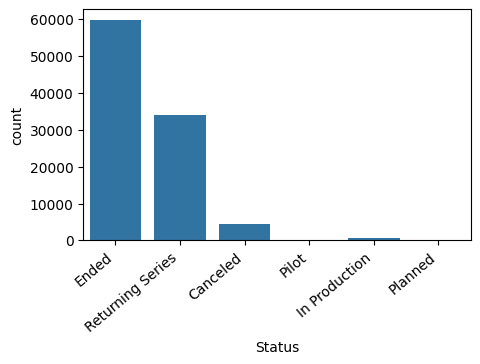

C:\Users\Pedro\AppData\Local\Temp\ipykernel_16520\1291712955.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


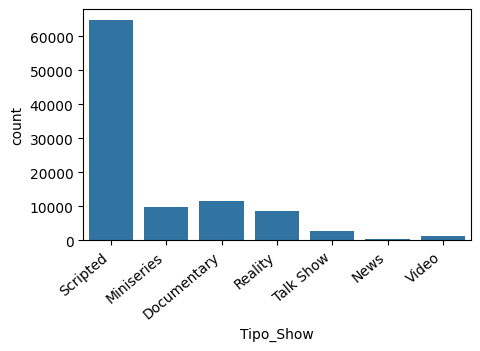

C:\Users\Pedro\AppData\Local\Temp\ipykernel_16520\1291712955.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


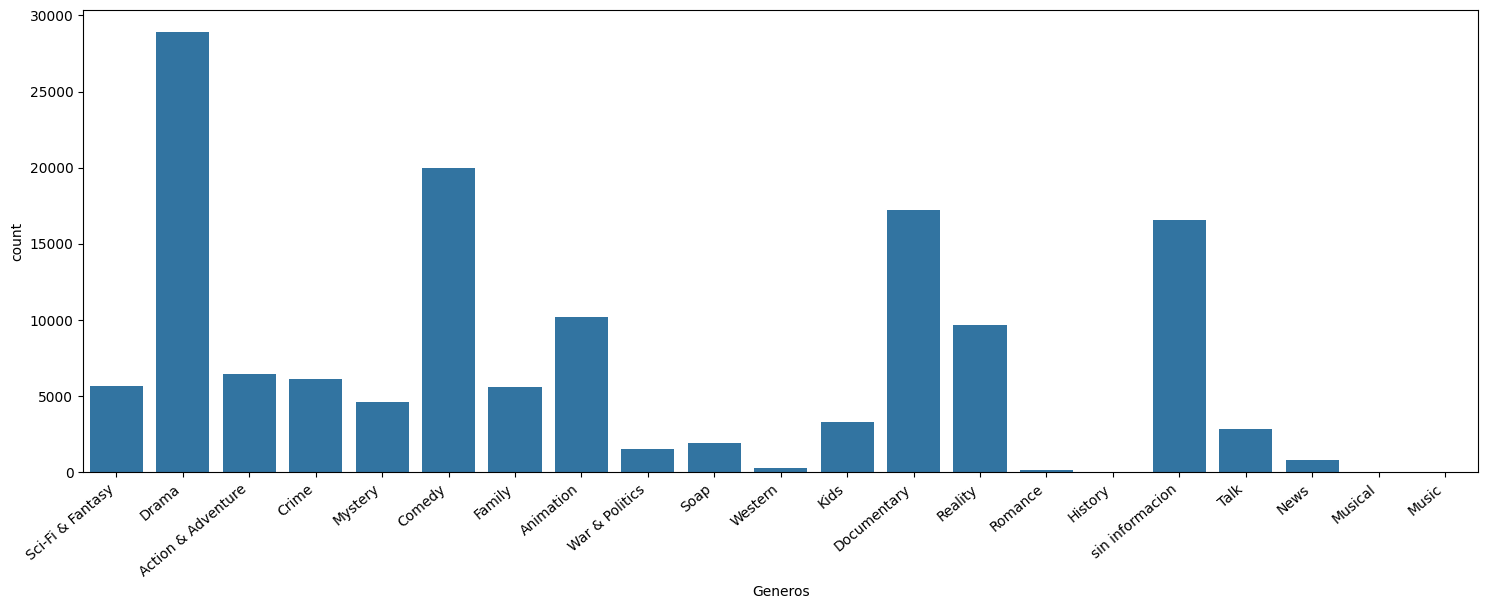

In [113]:

plt.figure(figsize=(5, 3))
ax=sns.countplot(data=tmdb,x="Status")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
plt.figure(figsize=(5, 3))
ax=sns.countplot(data=tmdb,x="Tipo_Show")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
plt.figure(figsize=(18, 6))
ax=sns.countplot(data=all_genres,x="Generos")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()



Se puede observar una gran diferencia en la proporcion de los generos de lo cual se puede analisar lo siguiente:
### Tipo de show
Es importante tener en cuenta esta distribución al realizar cualquier análisis posterior, ya que las tendencias observadas podrían estar sesgadas hacia los programas Scripted debido a su mayor representación en los datos. 
### Status
Al igual que en el tipo de show se puede observar que la distribucion esta marcada a 2 estados, en primer lugar los terminados lo cual indica que en su mayoria los show tienen un termino pudiendo entender el ciclo de vida de los show, en segundo lugar estan las series que resurgieron, este puede ser un punto de interes ya que significa que hubo un interes mayor al estimado originalmente. Por ultimo el cancelado aunque tiene un menor % de representacion puede ser util para estudiar las razones de cancelacion y si es posible encontrar patrones. 
### Genero
- existen genero de nicho como Romance, Music, History, Musical, en especifico el de musical como tiene una sola entrada no es posible hacer generarizaciones sobre el, mientras que el resto pueden tener un conteo bajo debido a que son muy de nicho y por ende obtienen una menor demanda. 
- Por el otro lado Drama, comedia y documentales, muestran que son los generos mas solicitados mostrando un interes  en tramas profundos, deseo de reir y por ultimo un interes en aprender.
- Por ultimo se debe recordar que la pagina funciona en base al conocimiento suministrado por los usuarios por lo que puede existir la posibilidad de que ciertos show no posean todos los generos correspondiente o que se utilice un termino muy especifico en vez de uno general generando una separacion, por ejemplo musicales y musica son generos separados en esta base asi como historia y documentales. 

Para facilitar el análisis y la segmentación de los datos, se creará una nueva variable binaria que indique si un show es del tipo "scripted" o no. Esta nueva variable permitirá una categorización más clara y una evaluación específica del impacto y las características de los shows con guión frente a los que no lo tienen.

In [114]:
tmdb['scripted']=tmdb['Generos'].apply(lambda x: 1 if x=='Scripted' else 0)
tmdb.head()

,id,Nombre_Serie,#_Temporadas,#_Episodios,Idioma_original,Votos_Totales,Voto_promedio,Categoria_Adulto,Fecha_Inicio,Fecha_Fin,...,Idiomas,Canales,Pais_Origen,Idiomas_hablados,Companias_Produccion,Paises_Produccion,Duracion_episodio,Mes,estacion,scripted
0,1399,Game of Thrones,8,73,en,21857,8.442,False,2011-04-17,2019-05-19,...,en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0,4,0,0
1,71446,Money Heist,3,41,es,17836,8.257,False,2017-05-02,2021-12-03,...,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70,5,1,0
2,66732,Stranger Things,4,34,en,16161,8.624,False,2016-07-15,2022-07-01,...,en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0,7,3,0
3,1402,The Walking Dead,11,177,en,15432,8.121,False,2010-10-31,2022-11-20,...,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42,10,2,0
4,63174,Lucifer,6,93,en,13870,8.486,False,2016-01-25,2021-09-10,...,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45,1,1,0


## 5 Graficos

Histograma 

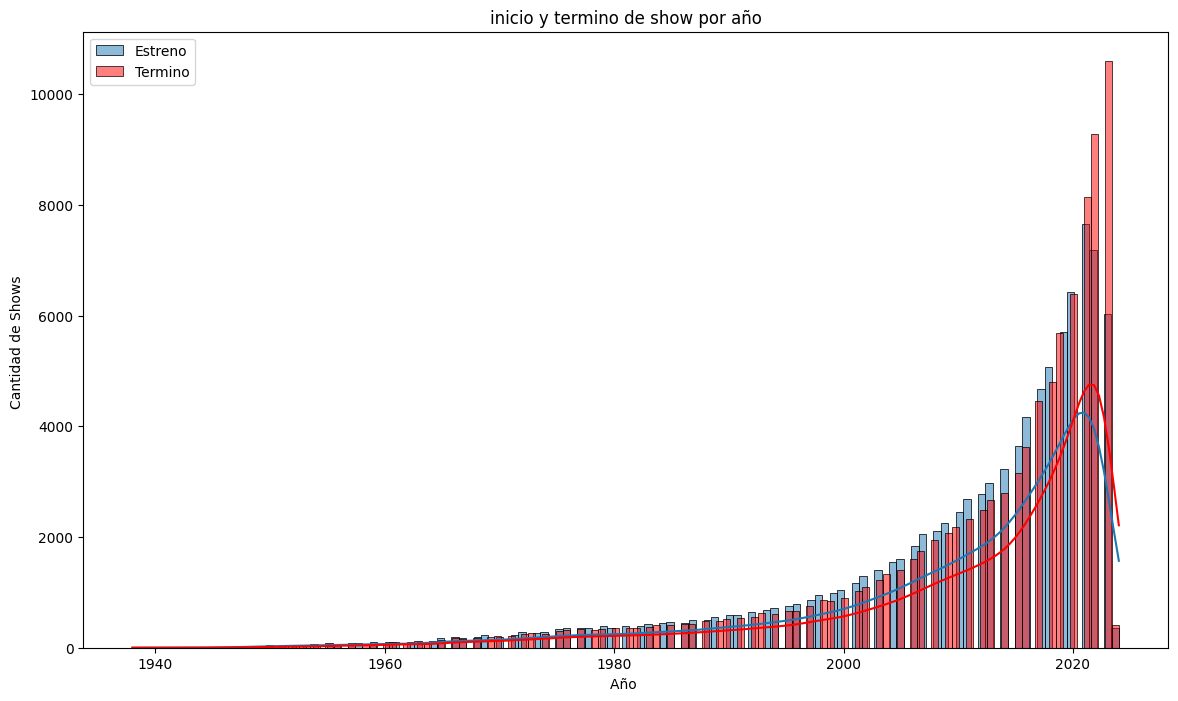

In [115]:
tmdb_fin=tmdb.dropna(subset=['Fecha_Fin'])
tmdb_fin['Fecha_Fin']=pd.to_datetime(tmdb_fin['Fecha_Fin'])
tmdb_fin['año']=tmdb_fin['Fecha_Fin'].dt.year
tmdb_fin['mes']=tmdb_fin['Fecha_Fin'].dt.strftime('%b')
tmdb_fin['anhomes']=tmdb_fin['Fecha_Fin'].dt.to_period('M')
tmdb_inicio=tmdb.dropna(subset=['Fecha_Inicio'])
tmdb_inicio['Fecha_Inicio']=pd.to_datetime(tmdb_inicio['Fecha_Inicio'])
tmdb_inicio['año']=tmdb_inicio['Fecha_Inicio'].dt.year
tmdb_inicio['mes']=tmdb_inicio['Fecha_Inicio'].dt.strftime('%b')
tmdb_inicio['anhomes']=tmdb_inicio['Fecha_Inicio'].dt.to_period('M')

plt.figure(figsize=(14, 8))
sns.histplot(x='año', data=tmdb_inicio,label="Estreno", kde=True)
sns.histplot(x='año', data=tmdb_fin, color="red",label="Termino", kde=True)
plt.xlabel('Año ')
plt.ylabel('Cantidad de Shows ')
plt.title('inicio y termino de show por año')
plt.legend() 

plt.show()


Se puede observar que existe un incremento constante en la cantidad de shows estrenados a lo largo del tiempo. Este comportamiento es esperable, ya que en los primeros años, el acceso a películas y televisión era limitado. A medida que ha evolucionado la tecnología, se ha facilitado el acceso a estos medios, lo que ha aumentado la demanda de nuevos contenidos.

Durante el 2020, se observa un notable incremento en la cantidad de shows estrenados. Este salto coincide con el inicio de la pandemia de COVID-19, un evento que generó un entorno ideal para el aumento en la producción de shows. Con las personas confinadas en sus hogares, el consumo de televisión y películas aumentó significativamente, impulsando así la creación de nuevos contenidos para satisfacer esta creciente demanda.

Es importante notar que también se registran shows con fechas de estreno en años futuros. Estos datos corresponden a aquellos shows que tienen una fecha estimada de emisión, reflejando la planificación continua de la industria para el lanzamiento de nuevos programas.

En cuanto a la cantidad de shows terminados por año, se observa un comportamiento similar al de los estrenos, pero con un desfase temporal. A medida que se producen más shows, naturalmente, más programas también llegan a su fin en años posteriores. Sin embargo, se destaca que, cerca del último auge en la producción de shows, el número de terminaciones supera al de estrenos. Esto puede ser indicativo de varias tendencias, como la finalización de programas debido a cambios en las preferencias de la audiencia, la culminación de series planeadas para ser de corta duración, o la reorganización de contenidos por parte de las plataformas de streaming y canales de televisión. Con respecto

A continuacion se desea ver si la popularidad de los show esta relacionada con el numero de voto. Para esto en primer lugar se deben descartar los valores 0 ya que indica que no tienen informacion.

,Votos_Totales,Popularidad
0,21857,1083.917
1,17836,96.354
2,16161,185.711
3,15432,489.746
4,13870,416.668
...,...,...
57494,1,0.840
57497,1,3.842
57498,1,0.600
57500,1,69.703


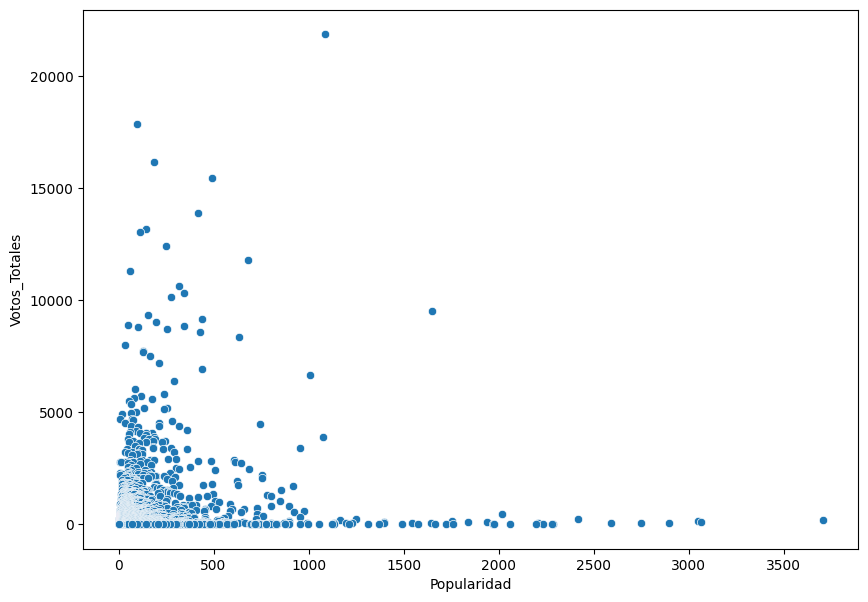

In [116]:
set_scater_1=tmdb[['Votos_Totales','Popularidad']]
set_scater_1=set_scater_1.drop(set_scater_1[set_scater_1.Votos_Totales==0].index)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Popularidad',y='Votos_Totales',data=set_scater_1)
plt.show
set_scater_1

In [117]:
np.corrcoef(set_scater_1['Popularidad'],set_scater_1['Votos_Totales'])[0,1]

0.22024542840632375

Del gráfico se puede observar una gran disparidad entre lo esperado y lo real. Uno esperaría que, a medida que un show se vuelve más popular, recibiría una mayor cantidad de votos, pero el gráfico muestra lo contrario. Esto se debe a que la popularidad es una función no lineal y no revelada al público que incluye diversas variables. Algunas de estas variables se encuentran en la base de datos utilizada, como la cantidad de votos y el día de estreno, mientras que otras son más complicadas de obtener, como el número de clics en la página, la cantidad de discusiones por día, entre otros factores. 

Se puede observar que la mayoría de los puntos se encuentran concentrados en la parte inferior izquierda del gráfico, lo cual indica poca popularidad y bajos votos. Esta concentración podría atribuirse a una saturación del mercado, donde la gran cantidad de opciones disponibles divide la atención del público. En un entorno donde los espectadores no pueden consumir todos los estrenos disponibles, los shows deben esforzarse más en diferenciarse y captar la atención del público para lograr una mayor popularidad y recibir más votos. 

Por ultimo se observa un valor de correlacion positivo bajo, lo cual indica que mientras mas votos mas popularidad pero  no se puede predecir de manera precisa la cantidad de votos basándose únicamente en la popularidad del programa o al reves.

Por ultimo se hara una visualizacion de como afecta la estacion en el inicio de los show y los generos emitidos.

In [118]:
show_verano=tmdb[tmdb['estacion']==1]['Generos'].dropna()
show_otono=tmdb[tmdb['estacion']==2]['Generos'].dropna()
show_invierno=tmdb[tmdb['estacion']==3]['Generos'].dropna()
show_primavera=tmdb[tmdb['estacion']==0]['Generos'].dropna()
all_genres_verano =show_verano.str.split(',').explode().str.strip()
all_genres_verano=all_genres_verano.to_frame().reset_index(drop=True)
all_genres_verano["Generos"]
print(all_genres_verano.value_counts())

all_genres_otono =show_otono.str.split(',').explode().str.strip()
all_genres_otono=all_genres_otono.to_frame().reset_index(drop=True)
all_genres_otono["Generos"]
print(all_genres_otono.value_counts())
all_genres_invierno =show_invierno.str.split(',').explode().str.strip()
all_genres_invierno=all_genres_invierno.to_frame().reset_index(drop=True)
all_genres_invierno["Generos"]
print(all_genres_invierno.value_counts())
all_genres_primavera =show_primavera.str.split(',').explode().str.strip()
all_genres_primavera=all_genres_primavera.to_frame().reset_index(drop=True)
print(all_genres_primavera)

Generos           
Drama                 8958
Comedy                6364
Documentary           5347
sin informacion       5093
Animation             3030
Reality               2825
Crime                 1956
Action & Adventure    1950
Family                1848
Sci-Fi & Fantasy      1643
Mystery               1337
Kids                  1165
Talk                   955
Soap                   584
War & Politics         494
News                   308
Western                137
Romance                 42
History                 14
Music                   11
Musical                  1
Name: count, dtype: int64
Generos           
Drama                 7095
Comedy                4849
Documentary           4069
sin informacion       4042
Animation             2538
Reality               2383
Action & Adventure    1638
Crime                 1518
Sci-Fi & Fantasy      1489
Family                1282
Mystery               1184
Kids                   738
Talk                   692
Soap              

<function matplotlib.pyplot.show(close=None, block=None)>

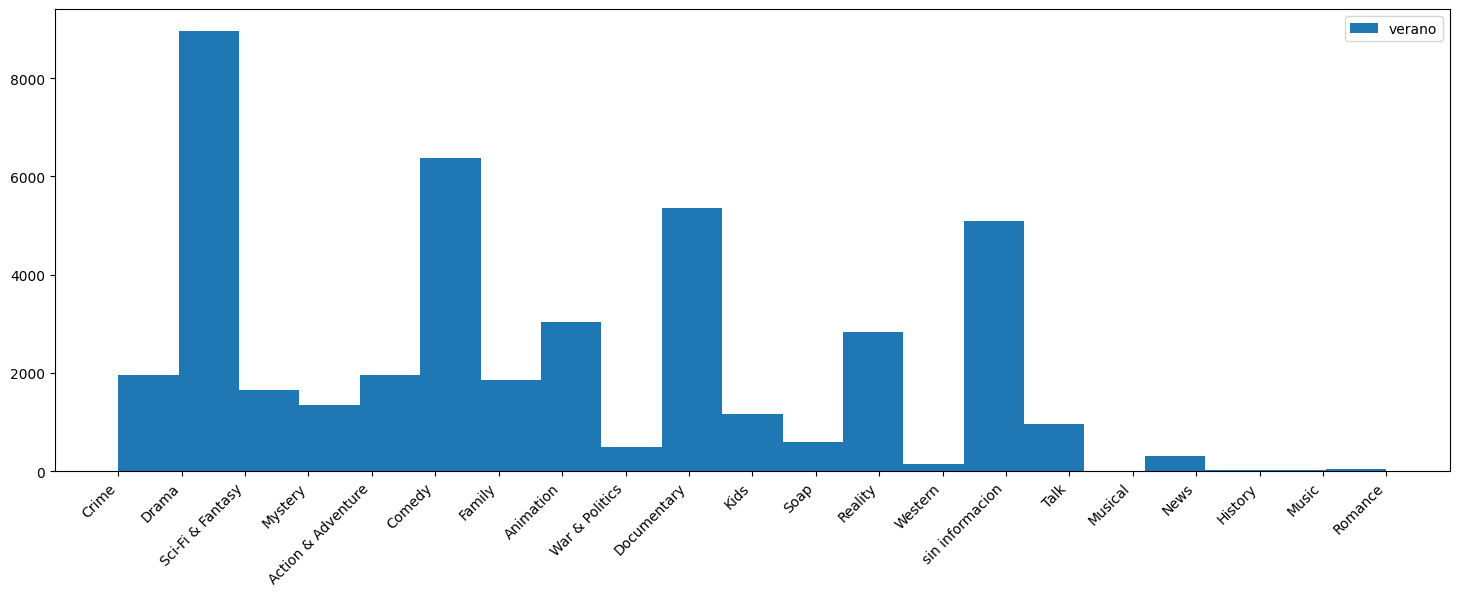

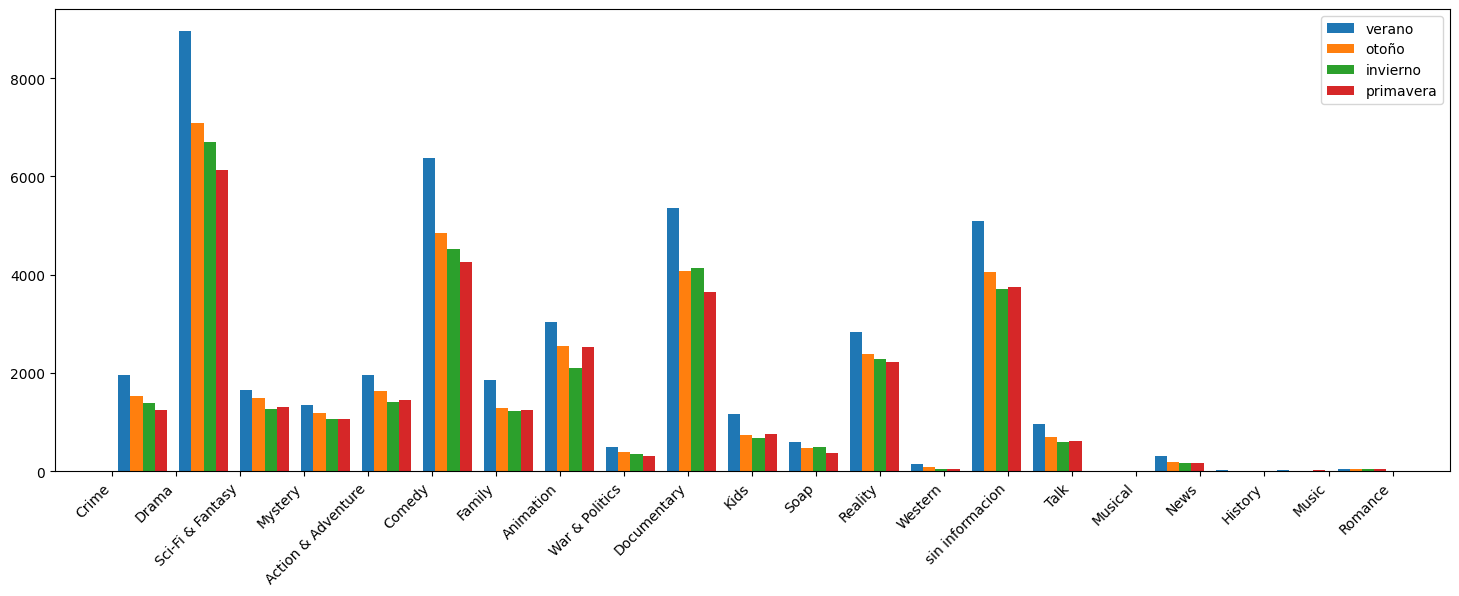

In [132]:

plt.figure(figsize=(18, 6))
plt.hist([all_genres_verano["Generos"]],label=["verano"],bins=21)

#plt.hist(all_genres_verano,alpha=0.7,bins=10)
#plt.hist(all_genres_otono,alpha=0.7,bins=10)
#plt.hist(all_genres_invierno, label='no adulto',alpha=0.7)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show
#otoño
plt.figure(figsize=(18, 6))
plt.hist([all_genres_verano["Generos"],all_genres_otono["Generos"],all_genres_invierno["Generos"],all_genres_primavera["Generos"]],label=["verano","otoño","invierno","primavera"],bins=21)

#plt.hist(all_genres_verano,alpha=0.7,bins=10)
#plt.hist(all_genres_otono,alpha=0.7,bins=10)
#plt.hist(all_genres_invierno, label='no adulto',alpha=0.7)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show


#plt.figure(figsize=(18, 6))
#ax=sns.countplot(data=all_genres,x="Generos")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.show()

Se puede observar que verano es la estacion con mas emisiones independiente del genero.